In [1]:
#| default_exp app

# Snake Image Classification

In [25]:
import toml
import fastai
import timm
import pandas
import albumentations
fastai.__version__, timm.__version__ , toml.__version__, pandas.__version__, albumentations.__version__

('2.7.12', '0.8.6dev0', '0.10.2', '1.5.2', '1.3.0')

In [3]:
#| export
from fastai.vision.all import *
from huggingface_hub import from_pretrained_fastai
import gradio as gr
import wikipedia
import pandas as pd

In [4]:
#| export
repo_id = "Jimmie/snake-species-identification"

# loading the model from huggingface_hub
learner = from_pretrained_fastai(repo_id)

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
#| export
path = Path('demo-images/')
countries = pd.read_csv('species_to_country_mapping.csv', index_col=0)

In [6]:
list(path.ls())

[Path('demo-images/masticophis.jpg'),
 Path('demo-images/micrurus.jpg'),
 Path('demo-images/agkistrodon.png'),
 Path('demo-images/Pantherophis.jpg'),
 Path('demo-images/lampropeltis.jpg'),
 Path('demo-images/thamnophis.jpg'),
 Path('demo-images/natrix.jpg'),
 Path('demo-images/nerodia.jpg'),
 Path('demo-images/tantilla.jpg'),
 Path('demo-images/crotalus.jpg')]

In [7]:
countries.head()

afghanistan  albania  algeria  angola  anguilla  \
Acanthophis antarcticus             0        0        0       0         0   
Acanthophis cryptamydros            0        0        0       0         0   
Acanthophis hawkei                  0        0        0       0         0   
Acanthophis laevis                  0        0        0       0         0   
Acanthophis praelongus              0        0        0       0         0   

                          antigua and barbuda  argentina  armenia  aruba  \
Acanthophis antarcticus                     0          0        0      0   
Acanthophis cryptamydros                    0          0        0      0   
Acanthophis hawkei                          0          0        0      0   
Acanthophis laevis                          0          0        0      0   
Acanthophis praelongus                      0          0        0      0   

                          australia  ...  uruguay  usa  uzbekistan  vanuatu  \
Acanthophis antarcticus           1  ...        0    0           0        0   
Acanthophis cryptamydros          1  ...        0    0           0        0   
Acanthophis hawkei                1  ...        0    0           0        0   
Acanthophis laevis                0  ...        0    0           0        0   
Acanthophis praelongus            1  ...        0    0           0        0   

                          venezuela  vietnam  western sahara  yemen  zambia  \
Acanthophis antarcticus           0        0               0      0       0   
Acanthophis cryptamydros          0        0               0      0       0   
Acanthophis hawkei                0        0               0      0       0   
Acanthophis laevis                0        0               0      0       0   
Acanthophis praelongus            0        0               0      0       0   

                          zimbabwe  
Acanthophis antarcticus          0  
Acanthophis cryptamydros         0  
Acanthophis hawkei               0  
Acanthophis laevis               0  
Acanthophis praelongus           0  

[5 rows x 195 columns]

In [8]:
sample_row = countries.loc["Acanthophis antarcticus"]
# for sample_row, get all columns with a value of 1 and return them in a list
countries.loc["Acanthophis antarcticus"][countries.loc["Acanthophis antarcticus"] == 1].index.tolist()

['australia', 'papua new guinea']

In [9]:
#| export
def get_countries(binomial):
    sample_row = countries.loc[binomial]
    country_list = sample_row[sample_row == 1].index.tolist()
    # title case all items in country_list
    country_list = [country.title() for country in country_list]
    # return all items in country_list as a string
    return ", ".join(country_list)

In [10]:
get_countries("Acanthophis antarcticus")

'Australia, Papua New Guinea'

In [11]:
get_countries('Acanthophis hawkei')

'Australia'

In [12]:
snakes = get_image_files(path)

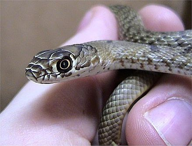

In [13]:
im = PILImage.create(snakes[0])
im.thumbnail((192,192))
im

In [14]:
snakes[0]

Path('demo-images/masticophis.jpg')

In [15]:
pred,idx,probs = learner.predict(im)
print(f"Prediction of the genus: {pred}")
print(f"Probability: {100*probs[idx].item():.2f}%")
print(f"Countries: {get_countries(pred)}")
print(wikipedia.summary(pred))

Prediction of the genus: Masticophis flagellum
Probability: 97.19%
Countries: Mexico, Turkey, Usa
Masticophis flagellum is a species of nonvenomous colubrid snake, commonly referred to as the coachwhip or the whip snake, which is endemic to the United States and Mexico. Six subspecies are recognized, including the nominotypical subspecies.


In [16]:
snakes[2]

Path('demo-images/agkistrodon.png')

In [17]:
pred,idx,probs = learner.predict(snakes[2])
print(f"Prediction of the genus: {pred}")
print(f"Probability: {100*probs[idx].item():.2f}%")
print(f"Countries: {get_countries(pred)}")
print(wikipedia.summary(pred))

Prediction of the genus: Agkistrodon contortrix
Probability: 100.00%
Countries: Mexico, Usa
The eastern copperhead (Agkistrodon contortrix), also known as the copperhead, is a species of venomous snake, a pit viper, endemic to eastern North America; it is a member of the subfamily Crotalinae in the family Viperidae.
The eastern copperhead has distinctive, dark brown, hourglass-shaped markings, overlaid on a light reddish brown or brown/gray background. The body type is heavy, rather than slender. Neonates are born with green or yellow tail tips, which progress to a darker brown or black within one year. Adults grow to a typical length (including tail) of 50–95 cm (20–37 in).
In most of North America, it favors deciduous forest and mixed woodlands. It may occupy rock outcroppings and ledges, but is also found in low-lying, swampy regions. During the winter, it hibernates in dens or limestone crevices, often together with timber rattlesnakes and black rat snakes. The eastern copperhead i

In [18]:
snakes[7]

Path('demo-images/nerodia.jpg')

In [19]:
pred,idx,probs = learner.predict(snakes[7])
print(f"Prediction of the genus: {pred}")
print(f"Probability: {100*probs[idx].item():.2f}%")
print(f"Countries: {get_countries(pred)}")
print(wikipedia.summary(pred))

Prediction of the genus: Nerodia rhombifer
Probability: 99.91%
Countries: Belize, Guatemala, Mexico, Usa
Nerodia rhombifer, commonly known as the diamondback water snake, is a species of nonvenomous natricine colubrid endemic to the central United States and northern Mexico. There are three recognized subspecies of N. rhombifer, including the nominotypical subspecies.


In [20]:
#| export
categories = tuple(learner.dls.vocab)

def classify_image(img):
    pred,idx,probs = learner.predict(img)
    countries = get_countries(pred)
    summary = wikipedia.summary(pred)
    wiki_link = f'Learn more: <a href={wikipedia.page(pred).url} target="_blank"> {pred}</a>'
    return dict(zip(categories, map(float, probs))), countries, summary, wiki_link

In [21]:
classify_image(snakes[7])

({'Agkistrodon contortrix': 7.677707714037751e-08,
  'Agkistrodon piscivorus': 6.286637017183239e-06,
  'Boa imperator': 4.072247179465194e-07,
  'Carphophis amoenus': 5.6490312090318184e-06,
  'Charina bottae': 5.74060948110855e-07,
  'Coluber constrictor': 2.58468026004266e-06,
  'Contia tenuis': 2.7349071842763806e-06,
  'Crotalus adamanteus': 2.228937091786065e-06,
  'Crotalus atrox': 3.808705969277071e-06,
  'Crotalus horridus': 1.1339221828166046e-06,
  'Crotalus pyrrhus': 1.3040776138950605e-06,
  'Crotalus ruber': 5.020022442181471e-08,
  'Crotalus scutulatus': 2.061498662442318e-06,
  'Crotalus viridis': 5.00088333410531e-07,
  'Diadophis punctatus': 7.539652528976148e-07,
  'Haldea striatula': 1.276449802389834e-05,
  'Heterodon platirhinos': 9.317946592091175e-07,
  'Hierophis viridiflavus': 9.718727369545377e-07,
  'Lampropeltis californiae': 5.61221838779602e-07,
  'Lampropeltis getula': 7.406313784485974e-07,
  'Lampropeltis triangulum': 1.079560024663806e-05,
  'Masticop

In [22]:
#| export
title = "Snake Species Identification"

description = """
This demo is an ongoing iteration of the [Snake Species Identification](https://github.com/jimmiemunyi/the-snake-project-cls) project meant to classify snakes up to the species level (binomial name).

Currently, it can classify snakes into 50 categories but it is continually updated to support more categories (over 200 for the final version).

The model can be found here: https://huggingface.co/Jimmie/snake-species-identification.
The model is trained on the following dataset: https://www.aicrowd.com/challenges/snakeclef2021-snake-species-identification-challenge.

Enjoy!
"""

article = "Blog posts on how the model is being trained: COMING SOON!"


image = gr.Image(shape=(224, 224))
label = gr.Label(num_top_classes=3, label='Binomial')
country = gr.Textbox(label='Countries where the species is found')
summary = gr.Textbox(label='Wikipedia Summary')
link = gr.HTML(label="Learn More:", show_label=True)
examples = list(path.ls())


intf = gr.Interface(fn=classify_image, inputs=image, outputs=[label, country, summary, link], examples=examples,
                   title = title, description = description, article = article, cache_examples=False)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# export

In [23]:
from nbdev.export import nb_export

In [ ]:
nb_export('app.ipynb', lib_path='.')